In [1]:
import numpy as  np

from digits.models import Generator, Discriminator
from digits.data import load_data, preprocessing
from digits.plot import plot_images

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

2022-08-27 18:00:17.527570: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-27 18:00:17.527593: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import tensorflow as tf
import datetime, os
from keras.callbacks import TensorBoard
import keras

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# %tensorboard --logdir tf_logs

# Create the TensorBoard callback,
# which we will drive manually
tensorboard = keras.callbacks.TensorBoard(
  log_dir=logdir,
  histogram_freq=0,
  write_graph=True,
  write_grads=True
)

In [3]:
input_dim = 100
output_dim = 784
units = 32 

generator = Generator(input_dim=input_dim, output_dim=output_dim, units=units)
discriminator = Discriminator(input_dim=output_dim, units=units)

tensorboard.set_model(discriminator)

2022-08-27 18:00:21.205198: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-27 18:00:21.205223: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-27 18:00:21.205243: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ryxx): /proc/driver/nvidia/version does not exist
2022-08-27 18:00:21.205586: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
PATH_TO_DATA = '../data'
data = load_data("../data/train.csv")

x_train, y_train, x_test, y_test = data

input_dim = 100

In [5]:
noise = np.random.normal(0, 1, [len(x_train), generator.input_dim])
generated_images = generator.predict(noise)

X = np.concatenate([x_train, generated_images])

# Labels for generated and real data
# 1 - real image
# 0 - generated
y = np.zeros(2 * len(x_train))
y[:len(x_train)] = 0.9

1125/1125 [==============================] - 2s 1ms/step


array([0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9])

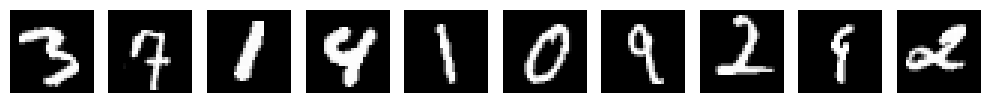

In [6]:
plot_images(X[:10].reshape(10, 28, 28))
y[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

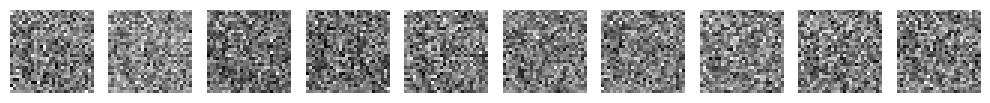

In [7]:
plot_images(X[-10:].reshape(10, 28, 28))
y[-10:]

In [8]:
history = discriminator.fit(x=X, y=y, epochs=10, batch_size=1000, shuffle=True)

Epoch 1/10


2022-08-27 18:00:28.437141: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 225792000 exceeds 10% of free system memory.


72/72 [==============================] - 1s 12ms/step - loss: 0.3379
Epoch 2/10
72/72 [==============================] - 1s 13ms/step - loss: 0.1851
Epoch 3/10
72/72 [==============================] - 1s 15ms/step - loss: 0.1745
Epoch 4/10
72/72 [==============================] - 1s 13ms/step - loss: 0.1713
Epoch 5/10
72/72 [==============================] - 1s 9ms/step - loss: 0.1698
Epoch 6/10
72/72 [==============================] - 1s 9ms/step - loss: 0.1690
Epoch 7/10
72/72 [==============================] - 1s 9ms/step - loss: 0.1685
Epoch 8/10
72/72 [==============================] - 1s 9ms/step - loss: 0.1681
Epoch 9/10
72/72 [==============================] - 1s 9ms/step - loss: 0.1678
Epoch 10/10
72/72 [==============================] - 1s 9ms/step - loss: 0.1675


In [9]:
discriminator.predict(x_test)

188/188 [==============================] - 0s 1ms/step


array([[0.8939352 ],
       [0.8673043 ],
       [0.8646064 ],
       ...,
       [0.87810206],
       [0.8690923 ],
       [0.8764678 ]], dtype=float32)